# Get the NINO 3.4 INDEX, based on the ERSST V5 SST dataset 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
from datetime import datetime

In [3]:
import numpy as np
import pandas as pd

In [4]:
NINO_url = 'http://www.cpc.ncep.noaa.gov/data/indices/ersst5.nino.mth.91-20.ascii'
opath = '/media/nicolasf/END19101/data/PICT/datasets/Indices/NINO34_monthly_1950_2021_1981_2010_Clim.csv'
clim_start = '1981'
clim_end = '2010'

In [5]:
nino = pd.read_csv(NINO_url, sep='\s+', engine='python')

In [6]:
nino.columns

Index(['YR', 'MON', 'NINO1+2', 'ANOM', 'NINO3', 'ANOM.1', 'NINO4', 'ANOM.2',
       'NINO3.4', 'ANOM.3'],
      dtype='object')

In [7]:
nino.tail()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
876,2023,1,24.00,-0.57,25.10,-0.56,27.66,-0.66,25.83,-0.71
877,2023,2,26.58,0.48,26.31,-0.10,27.64,-0.55,26.29,-0.46
878,2023,3,27.97,1.48,27.50,0.30,28.06,-0.26,27.18,-0.11
879,2023,4,28.16,2.62,28.05,0.47,28.75,0.12,27.96,0.14
880,2023,5,26.64,2.23,28.03,0.78,29.17,0.25,28.33,0.40


In [8]:
nino = nino[['YR','MON','NINO3.4']]

In [9]:
nino.tail()

,YR,MON,NINO3.4
876,2023,1,25.83
877,2023,2,26.29
878,2023,3,27.18
879,2023,4,27.96
880,2023,5,28.33


In [10]:
nino.loc[:,'DAY'] = 1

In [11]:
nino_clim = nino.copy()

In [12]:
nino_clim.index = nino_clim.YR

In [13]:
nino_clim = nino_clim.loc[1981:2010,:]

In [14]:
nino_clim = nino_clim.groupby(nino_clim.MON).mean()

### get a proper datetime index from the `[['YR', 'MON', 'DAY']]` columns

In [15]:
nino.index = nino[['YR', 'MON', 'DAY']].apply(lambda d : datetime(*d), axis = 1)

In [16]:
nino.tail()

,YR,MON,NINO3.4,DAY
2023-01-01,2023,1,25.83,1
2023-02-01,2023,2,26.29,1
2023-03-01,2023,3,27.18,1
2023-04-01,2023,4,27.96,1
2023-05-01,2023,5,28.33,1


### anomalies WRT to the climatology defined above (1981 - 2010)

In [17]:
def demean(x): 
    return x - x.loc[str(clim_start):str(clim_end)].mean()

In [18]:
nino['anoms'] = nino.groupby(nino.MON)[['NINO3.4']].transform(demean)

<AxesSubplot:>

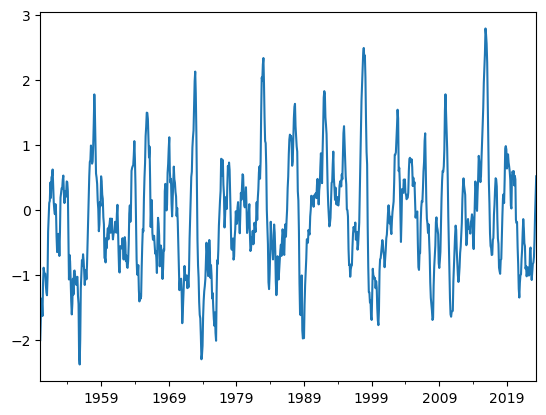

In [19]:
nino.anoms.plot()

In [20]:
ninos = nino[['anoms']]
ninos.columns = ['NINO34']

In [21]:
ninos.head()

,NINO34
1950-01-01,-2.002333
1950-02-01,-1.681667
1950-03-01,-1.364667
1950-04-01,-1.429667
1950-05-01,-1.632000


In [22]:
ninos.tail()

,NINO34
2023-01-01,-0.722333
2023-02-01,-0.451667
2023-03-01,-0.054667
2023-04-01,0.250333
2023-05-01,0.518000


In [23]:
ninos = ninos.loc['1950':'2021',:]

In [24]:
ninos.tail()

,NINO34
2021-08-01,-0.514000
2021-09-01,-0.557333
2021-10-01,-0.903000
2021-11-01,-0.867667
2021-12-01,-1.021000


### saves to disk 

In [25]:
ninos.to_csv(opath)